In [1]:
import HydroToolkit as htk

# Loading Data

The fundamental Class of HydroToolkit can use raw csv files for Q, LF and TEMP as input or you can also parse a dataframe directly.

## Example 1

In [2]:
path = r'M:\WASSERRESSOURCEN - GQH Stufe 1 2024 - 2400613\C GRUNDLAGEN\01-Daten\05-HD Tirol - 15min\Anfrage Juni 2024'

searchstring = 'Lehnbach'

path_lf, path_q, path_t = htk.filter_by_string(htk.list_files(path), searchstring)
X = htk.Spring({'Q':path_q, 'LF': path_lf, 'TEMP':path_t}, path_q)
X.df.head()

,Q,LF,TEMP
time,,,
1999-09-09 13:30:00,NaN,NaN,5.49
1999-09-09 13:45:00,NaN,NaN,5.45
1999-09-09 19:45:00,NaN,NaN,5.45
1999-09-09 20:00:00,NaN,NaN,5.46
1999-09-09 20:30:00,NaN,NaN,5.45


# Basic Statistics

In [3]:
X.stats

,Q,LF,TEMP
count,260291.0,520721.0,531553.0
mean,69.9,227.3,5.7
std,39.5,10.7,0.2
min,21.0,189.0,5.0
25%,44.0,221.0,5.6
50%,61.0,226.0,5.7
75%,83.0,231.0,5.9
max,585.0,342.0,7.0
max_min_ratio,27.9,1.8,1.4


# Plots

Mann-Kendall: Q = 0.15 * year + 51.85, p-value: 0.00
Mann-Kendall: LF = 0.66 * year + 217.41, p-value: 0.00
Mann-Kendall: TEMP = 0.02 * year + 5.49, p-value: 0.00


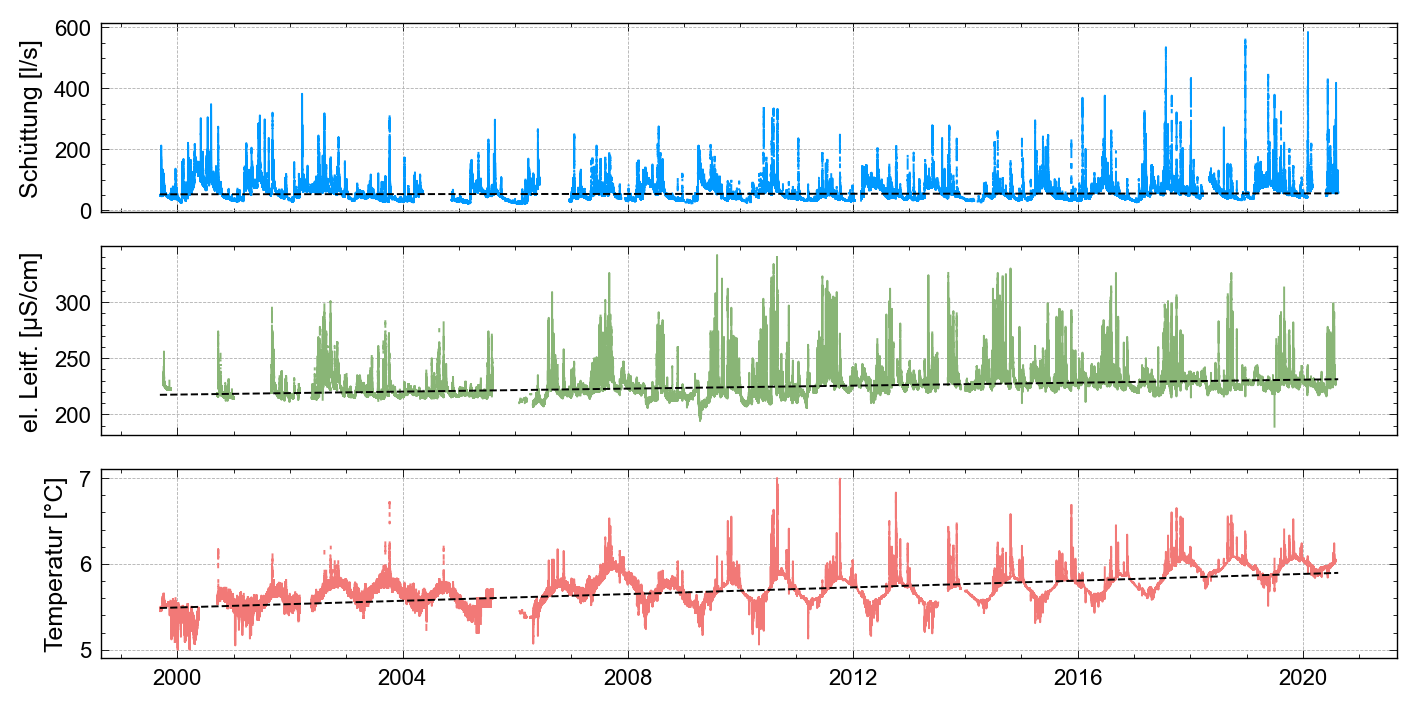

In [4]:
# regular time series plot, with options to plot a trend line
# select variables to plot and apply a low-pass filter
fig, ax = X.plot_timeseries(trend=True, filter=True, daily=False)

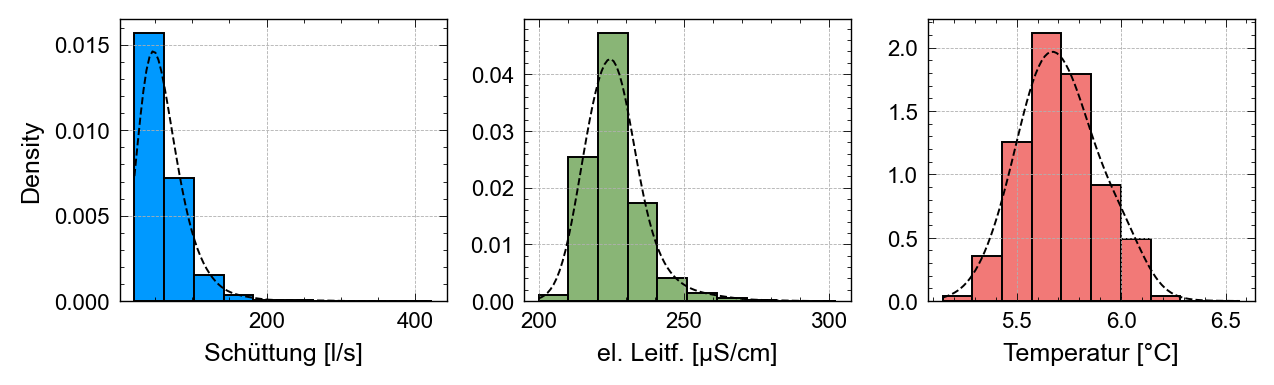

In [5]:
# histogrm plot of the data. The Variables can be selected and you
# may decide whether to plot the resampled daily data or the native resolution
fig, ax = X.plot_histogram(daily=True)

Mann-Kendall: Q = 0.15 * year + 51.85, p-value: 3.5e-05
Mann-Kendall: LF = 0.66 * year + 217.41, p-value: 0.0


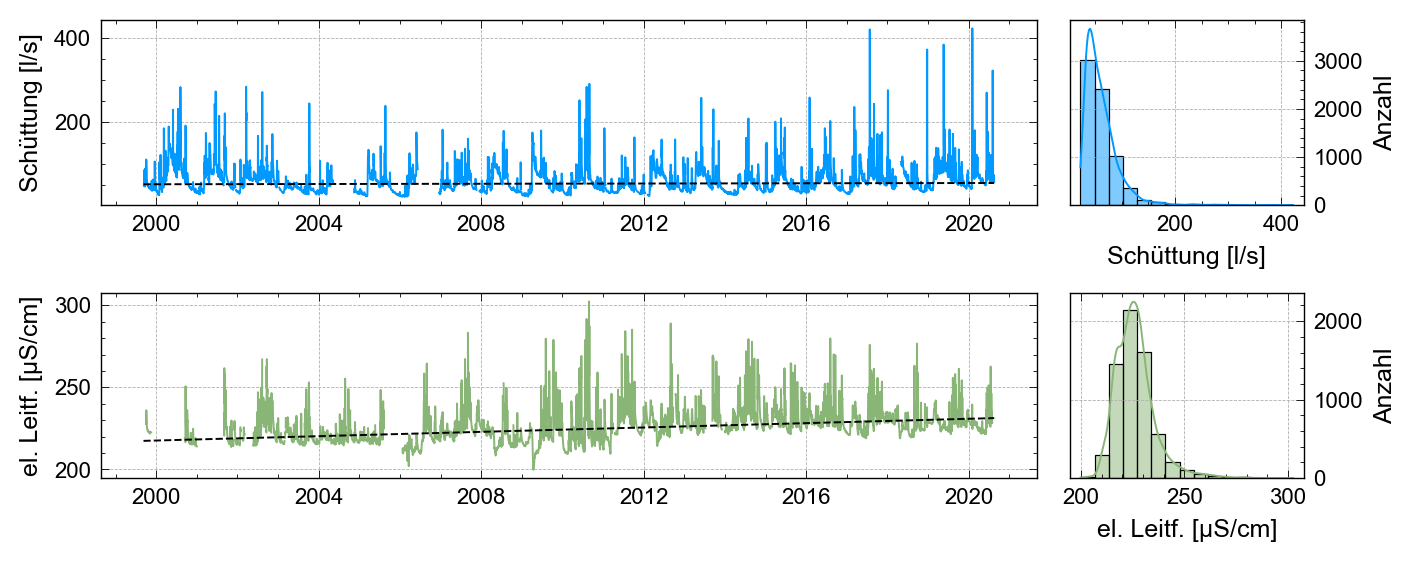

In [6]:
# combined time series and histogram plot. The timeseries plots can be 
# customized with a seasonal mann-kendall trend line. Again, you may select 
# variables and what resolution is used (daily or native)
fig, ax = X.plot_ts_hist(variables=['Q', 'LF'], trend=True)

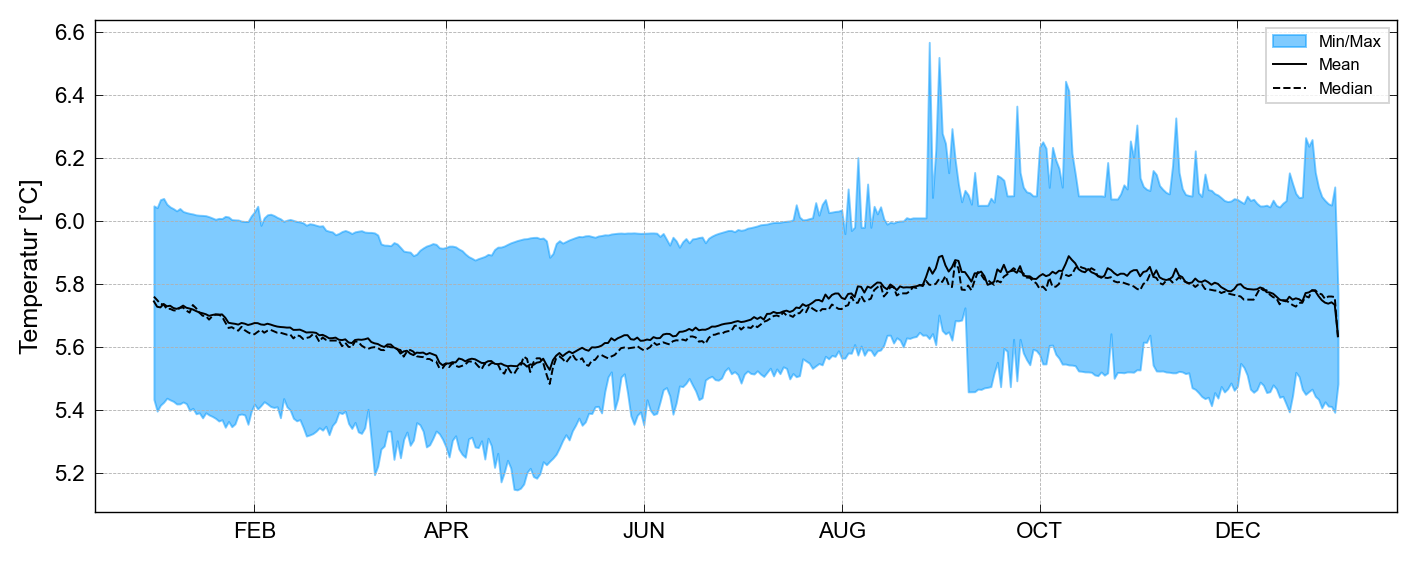

In [7]:
# plot the confidence interval depiction per day of the year. you may select
# the variable to plot
fig, ax = X.plot_confidence_intervals(variable='TEMP')

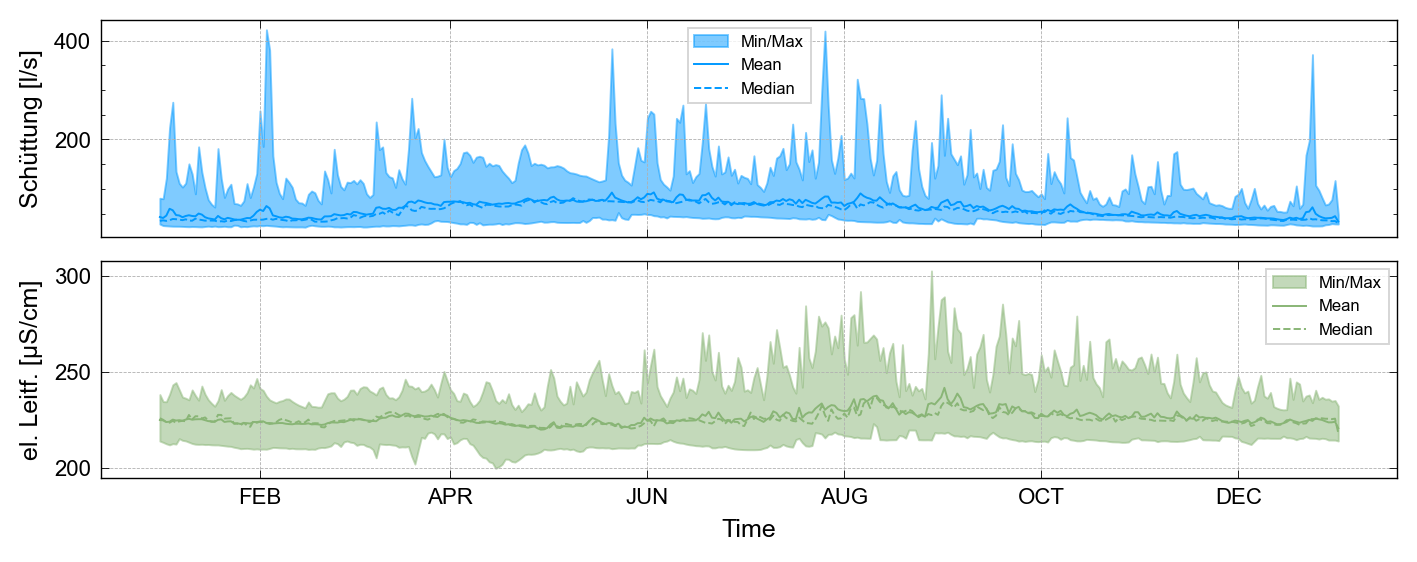

In [8]:
# you can also plot the confidence intervals for multiple variables in a panel
fig, ax = X.plot_ci_panel(variables=['Q', 'LF'])

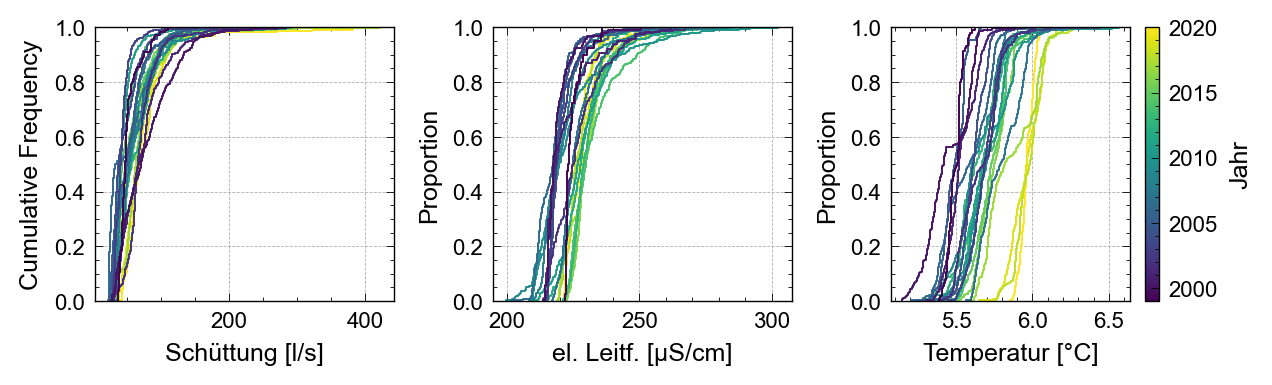

In [9]:
# cumulative distributions grouped by year
fig, ax = X.plot_cumulative_distribution()

z:\Projekte\HydroToolkit\HydroToolkit\plotting.py:374: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  annual = pd.concat([annual, coeffs])


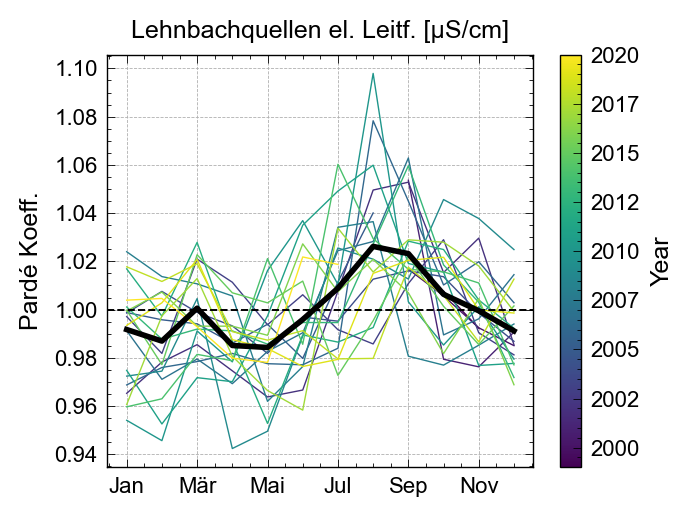

In [10]:
# pardé coefficient plot. you may select the variable to plot
fig, ax = X.plot_parde_coefficients(variable='LF')

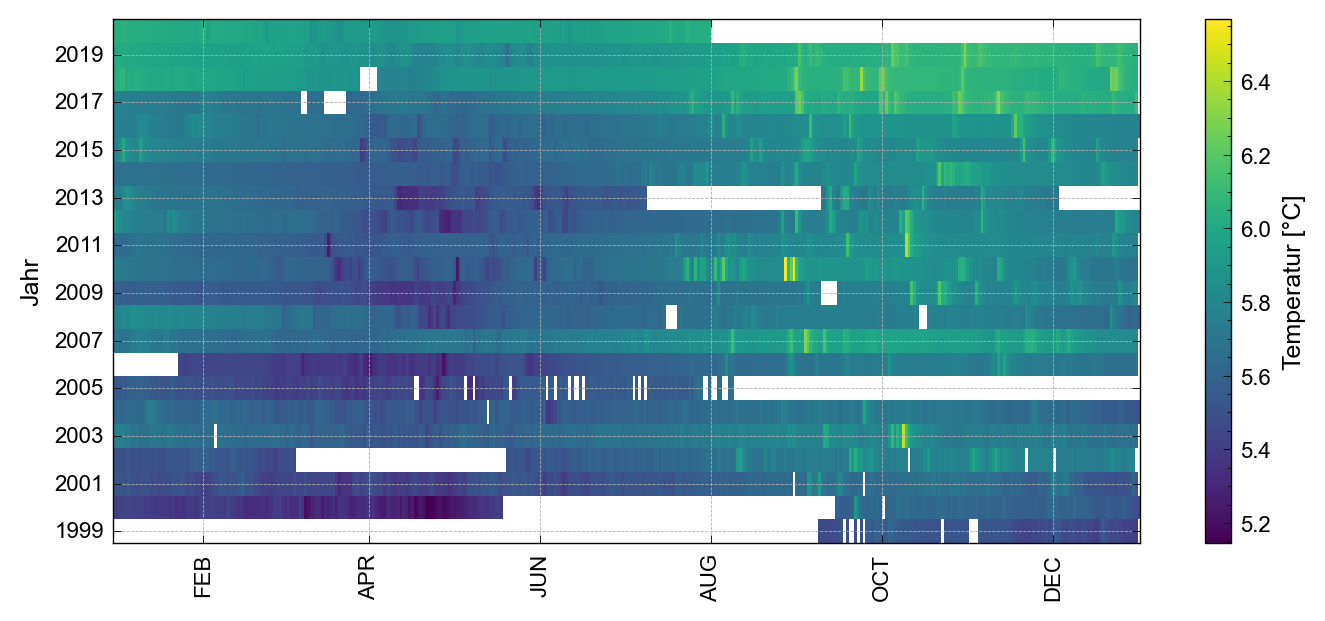

In [11]:
# heatmaps of all variables
fig, ax = X.plot_heatmap(variable='TEMP')

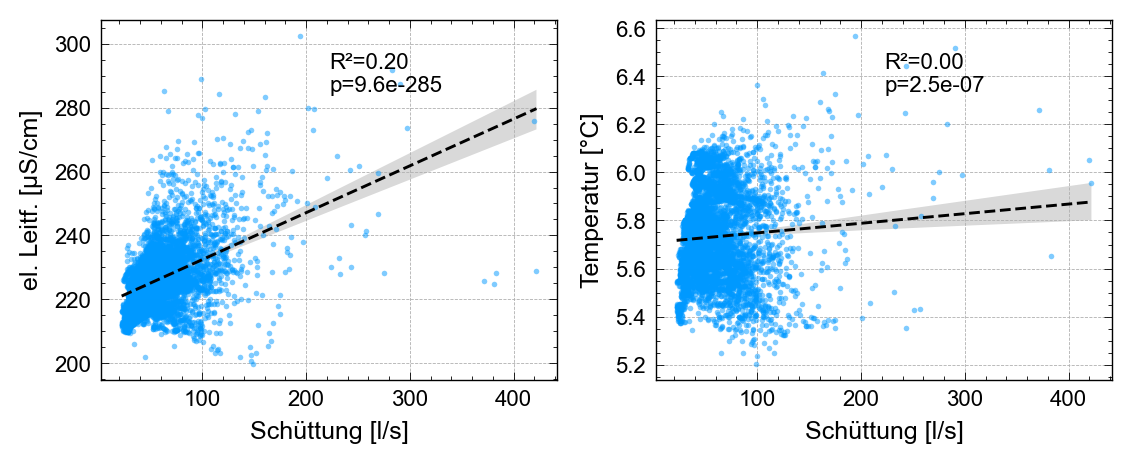

In [12]:
# scatter plots with regression lines. you may select the variable pairs to plot
fig, axes = X.plot_scatter(variable_pairs=[('Q', 'LF'), ('Q', 'TEMP')],
                           regression=True)

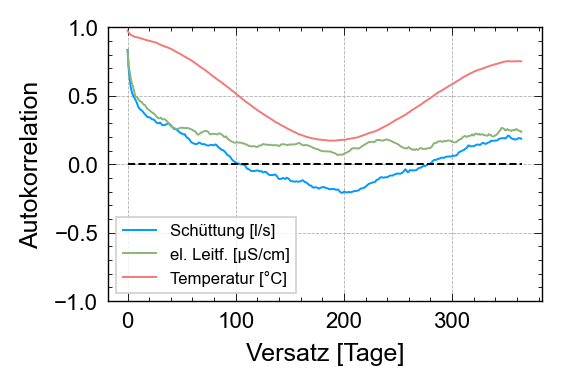

In [13]:
# plot autocorrelation functions. you may select the variable to plot
fig, ax = X.plot_autocorrelation()

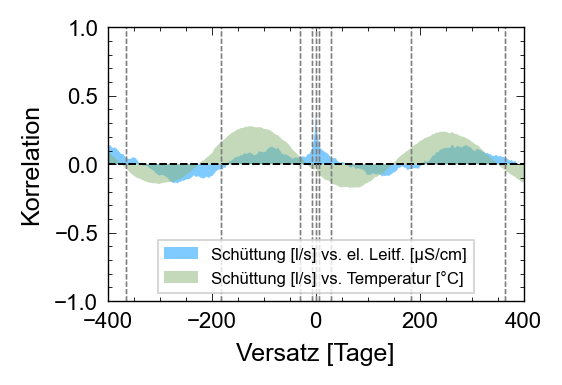

In [14]:
# cross correlation between parameters
fig, ax = X.plot_cross_correlation()

c:\Users\ptoechterle.WTPC143\.conda\envs\hydro_env\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\ptoechterle.WTPC143\.conda\envs\hydro_env\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\ptoechterle.WTPC143\.conda\envs\hydro_env\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


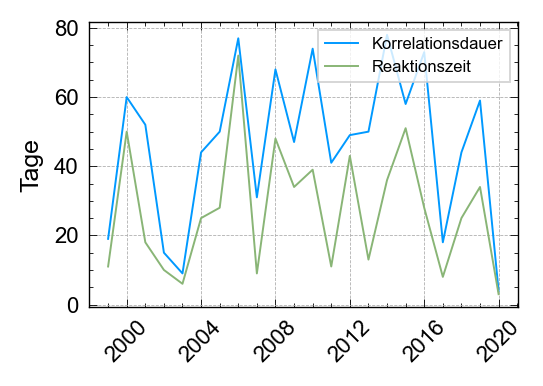

In [15]:
# timeseries of autocorrelation parameters
fig, ax = X.plot_autocorr_timeseries()

## Saving Plots
All plots can be saved by setting the `save` keyword `True`. You can also specify a `path` - if not the default location in the root directory will be used

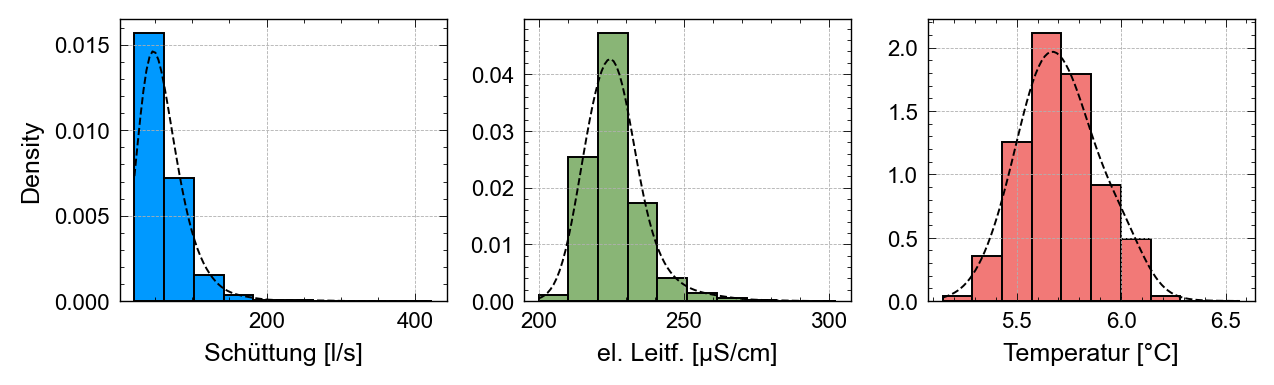

In [16]:
fig, ax = X.plot_histogram(save=True, path='histogram.png')

# Calculations

In [17]:
# minimum catchment area from mean discharge and mean annual precipitation 
# (preip data taken from spartacus v2.1 data set)
A = X.calc_catchment_area()

Catchment area @ 70 l/s and 1521 mm/m² = 1.45 km² 


slope per 100m: -0.17, intercept: -10.28, R²: 0.65
Mean Catchment elevation: 1214 m


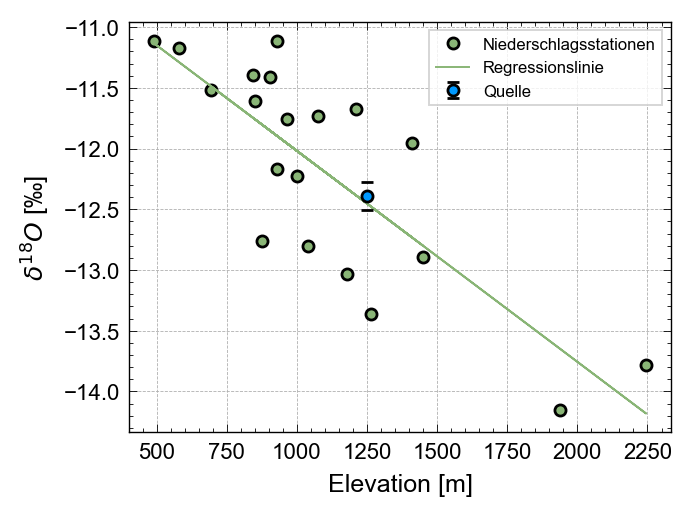

In [18]:
# mean catchment elevation from isotope data
# delta18O lapse rate calculated from station measurements across Tirol
fig, ax = X.mean_catchment_elevation(spring_elevation=1250, plot=True)

# Recession curves and aquifer storage parameters

Maillet Model: Q0 = 40 l/s, alpha = 0.0068, R² = 0.9741
Maillet Model: Q0 = 39 l/s, alpha = 0.0057, R² = 0.8688
Maillet Model: Q0 = 39 l/s, alpha = 0.0077, R² = 0.9357


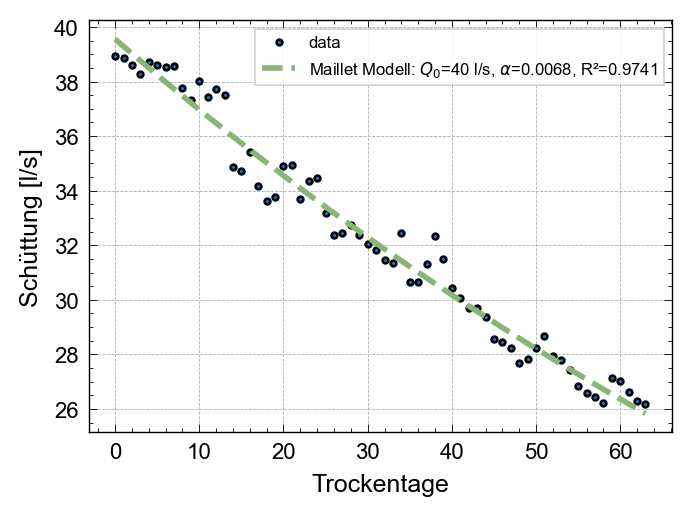

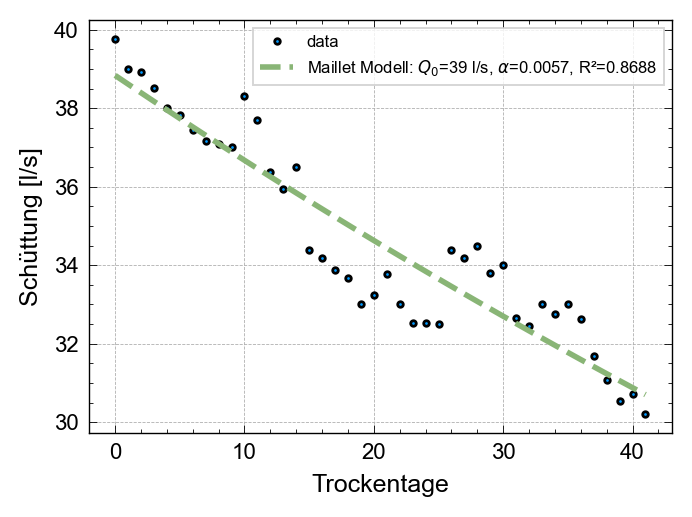

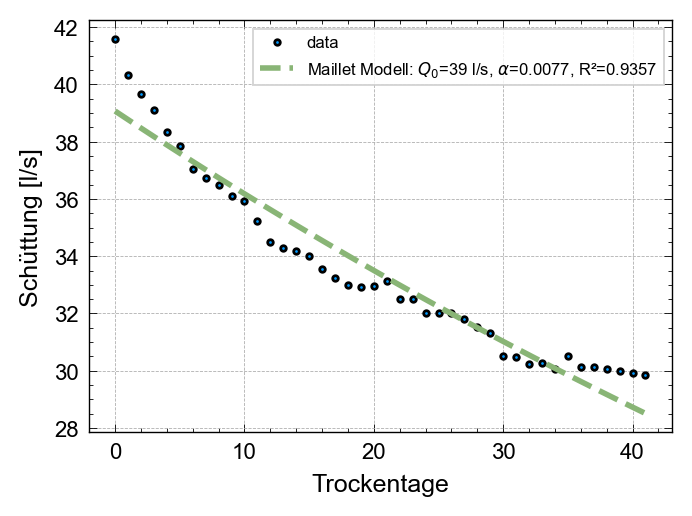

In [20]:
# select time slices for recession curve analysis
import pandas as pd

timeslices = [
    [pd.Timestamp('2005-10-13'), pd.Timestamp('2005-12-15')],
    [pd.Timestamp('2013-12-15'), pd.Timestamp('2014-01-25')],
    [pd.Timestamp('2016-11-28'), pd.Timestamp('2017-01-08')],
    ]

# plot individual recession curves for the selected time slices
# you may choose between the Maillet and Boussinesq models
for t0, tn in timeslices:
    fig, ax = X.recession_curve(t0, tn, model='Maillet', plot=True)
    data = X.df[t0:tn]

Maillet Model: Q0 = 40 l/s, alpha = 0.0068, R² = 0.9741
Maillet Model: Q0 = 39 l/s, alpha = 0.0057, R² = 0.8688
Maillet Model: Q0 = 39 l/s, alpha = 0.0077, R² = 0.9357


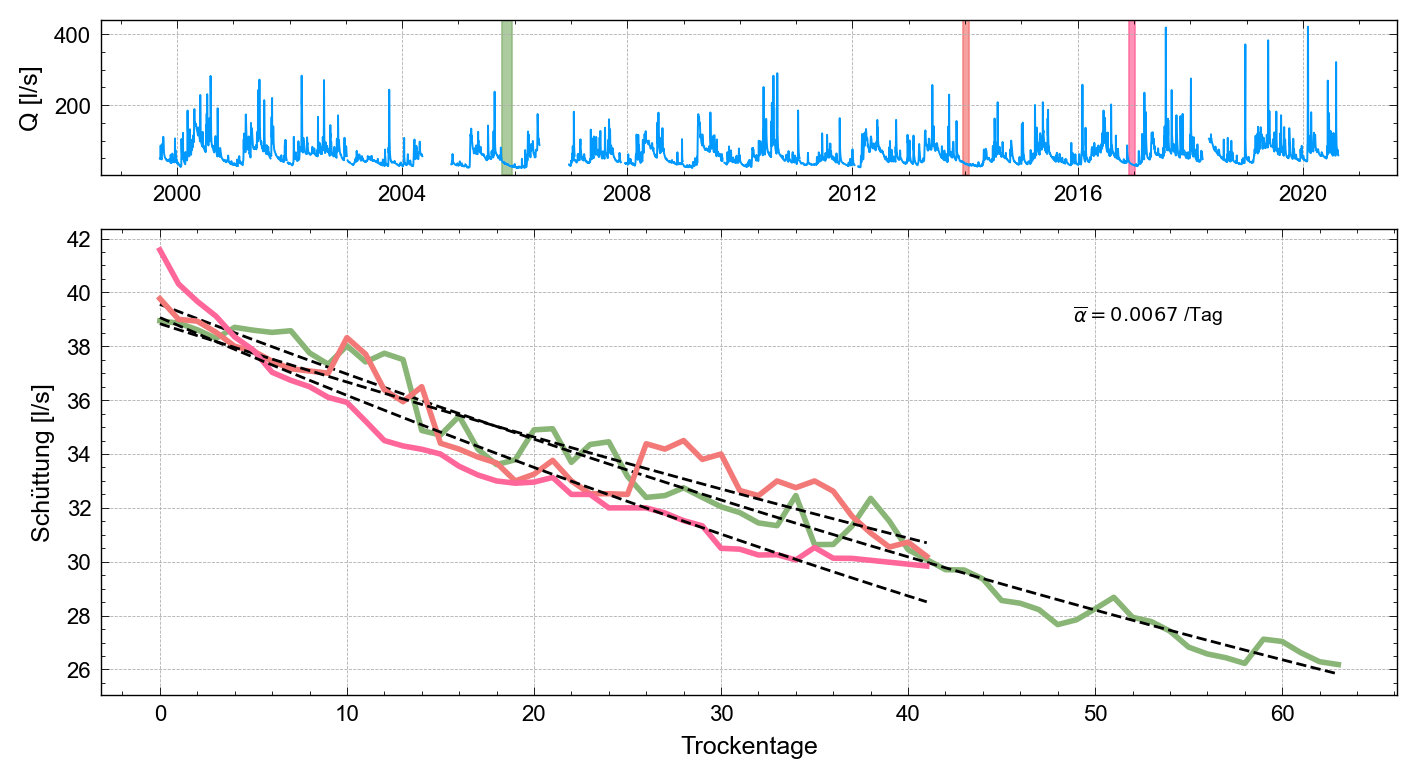

In [21]:
# plot all recession curves in a single plot
fig, ax = X.plot_recession_curves(timeslices)

In [22]:
# calculate the aquifer metrics for the spring based on alpha parameter 
# from recession curve analysis
alpha = 0.0065
t05, v0, tau = X.print_aquifer_metrics(alpha)

Mean discharge = 70 l/s 
Mean annual Discharge = 1.9e+06 m³ 
Mean storage Volume = 9.292e+05 m³ 
t(1/2) = 107 days 
Mean residence time = 177 days


In [23]:
# print autocorrelation statistics for all parameters
X.autocorrelation_stats

,Q,LF,TEMP
iak,0.148919,0.197222,0.509924
kd,96.000000,NaN,NaN
rt,55.000000,90.000000,166.000000


# Recharge Processes

In [24]:
# select time slices for the analysis
t0, tn = [pd.Timestamp('2017-05-01'), pd.Timestamp('2017-08-31')]

# get the spartacus data for precipitation and daily max temperature (TX)
precip = X.pull_spartacus(t0, tn)
temp = X.pull_spartacus(t0, tn, parameter='TX')

Text(0.5, 1.0, 'Schüttung vs. Lufttemperatur')

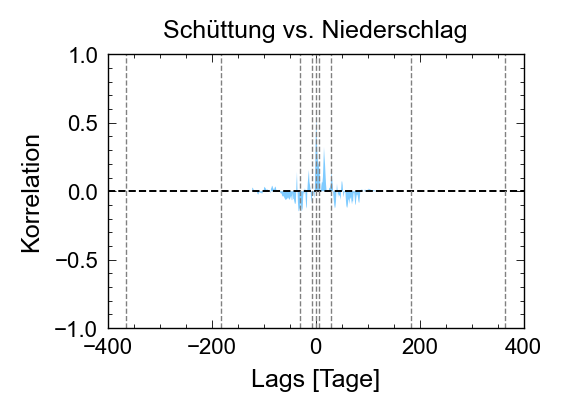

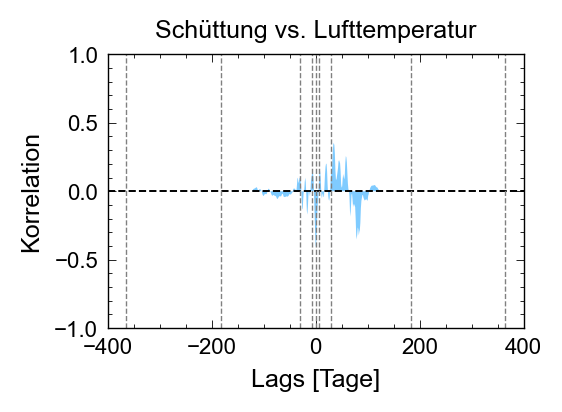

In [25]:
# compute cross correlation between spring discharge and precipitation. You may
# wish to plot the cross correlation function by setting plot=True
fig, ax = htk.compute_cross_correlation(X.df.Q.loc[t0:tn], precip.RR,
                                             plot=True)
ax.set_title('Schüttung vs. Niederschlag')

# repeat the same thing for temperature
fig, ax = htk.compute_cross_correlation(X.df.Q.loc[t0:tn], temp.TX,
                                             plot=True)
ax.set_title('Schüttung vs. Lufttemperatur')

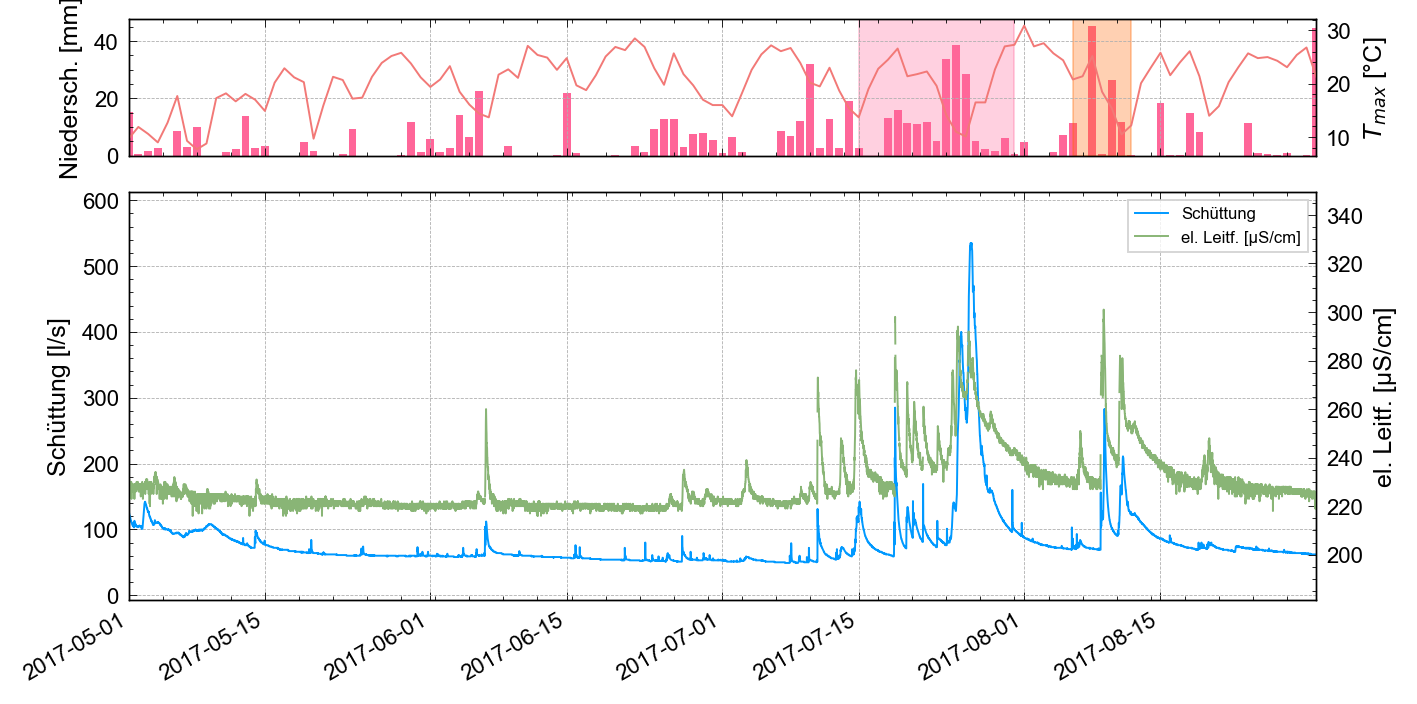

In [26]:
# create a plot of the recharge event with precipitation and temperature
# and the spring parameters
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,1, figsize=(htk.page, htk.page*0.5), sharex=True,
                         gridspec_kw={'height_ratios': [1, 3]})

# plot the precipitation data
ax = axes[0]
ax.bar(precip.index, precip.RR, color='#ff6699')
ax.set_ylabel('Niedersch. [mm]')

# plot the temperature data
ax2 = plt.twinx(ax)
ax2.plot(temp, color='#f27977')
ax2.set(ylabel=r'$T_{max}$ [°C]')
ax2.grid(False)

# maybe add marks for the recharge events ?
ax.axvspan('2017-07-15','2017-07-31', color='#ff6699', alpha=0.3)
ax.axvspan('2017-08-06','2017-08-12', color='#ff6600', alpha=0.3)

# plot the spring parameters in a separate panel of the plot
ax = axes[1]
line1, = ax.plot(X.df.Q.interpolate(), label='Schüttung')
ax.set_xlim((t0,tn))
ax2 = plt.twinx(ax)
line2, = ax2.plot(X.df.LF, c='#89b576', label='el. Leitf. [µS/cm]')

# style the plot
ax.set_ylabel('Schüttung [l/s]')
ax2.grid(False)
ax2.set(ylabel='el. Leitf. [µS/cm]')
fig.autofmt_xdate()

# add a legend
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax.legend(lines, labels)

# Chemistry

Trilinear Piper plot created. Saving it to z:\Projekte\HydroToolkit 



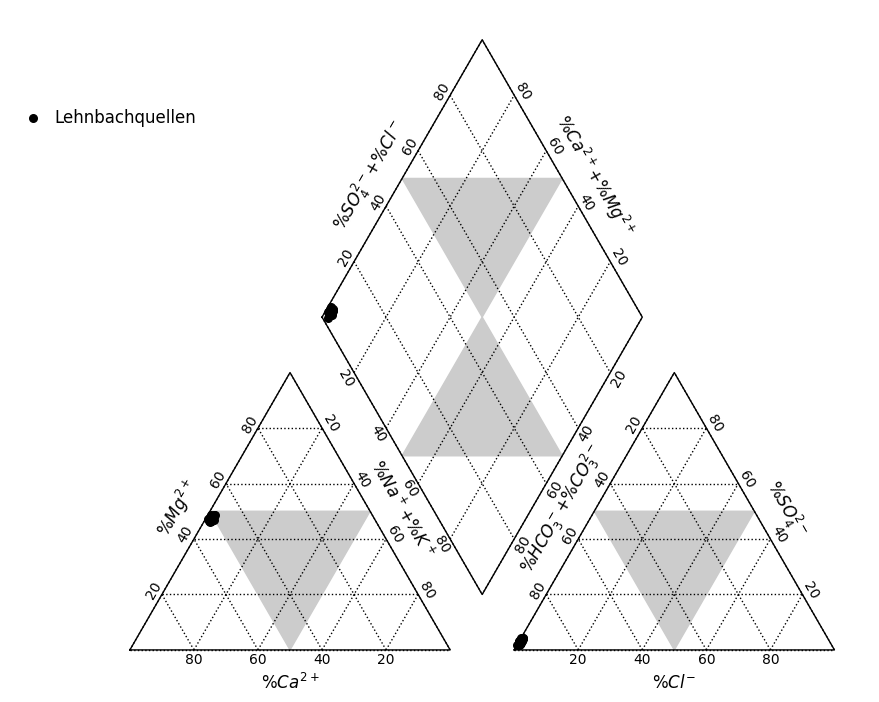

In [27]:
# you can also generate chemist plots for the spring using the data from GZÜV
# measurements
X.plot_chemisty(kind='piper', path='')

Gibbs plot created. Saving it to z:\Projekte\HydroToolkit 



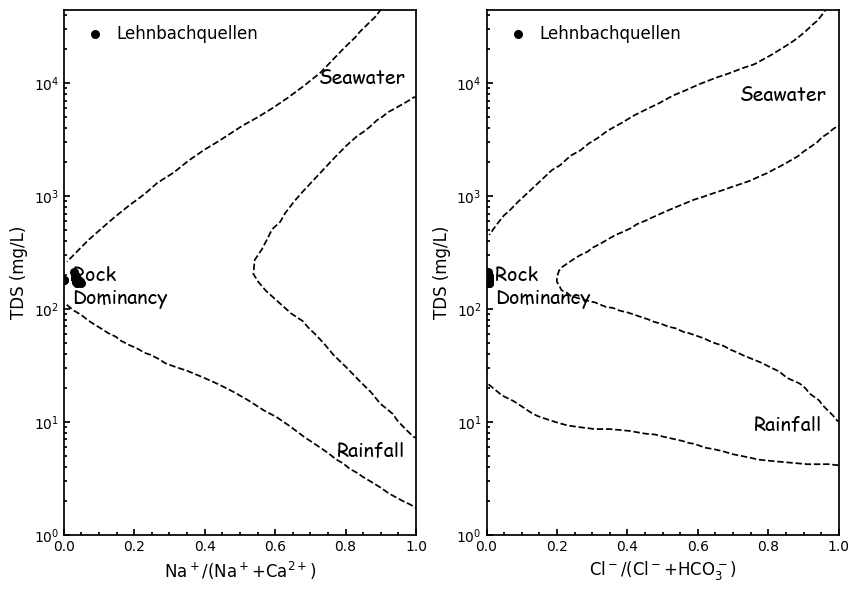

In [28]:
X.plot_chemisty(kind='gibbs', path='')

Chadha plot created. Saving it to z:\Projekte\HydroToolkit 



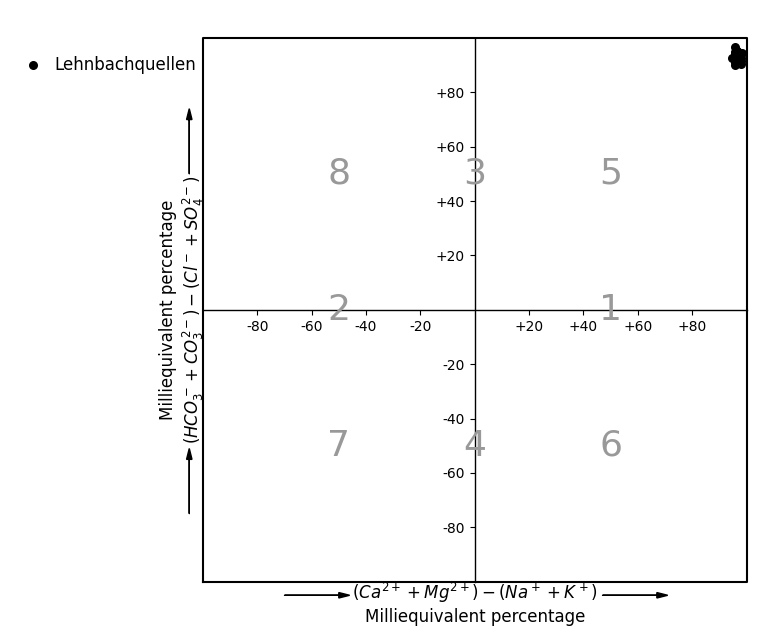

In [30]:
X.plot_chemisty(kind='chadha', path='')